In [17]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_clean_data import get_data, clean_data

In [3]:
prelim_df = get_data()

In [4]:
X, y = clean_data(prelim_df, True)

In [6]:
pd.notnull(X).sum()

sb_tot_partcp_cnt        9113
sb_eff_int_rate_prcnt    9113
sb_fndng_short_ind       9113
sb_pr_yr_fndng_prcnt     9113
11                       9113
21                       9113
22                       9113
23                       9113
31                       9113
32                       9113
33                       9113
42                       9113
44                       9113
45                       9113
48                       9113
49                       9113
51                       9113
52                       9113
53                       9113
54                       9113
55                       9113
56                       9113
61                       9113
62                       9113
71                       9113
72                       9113
81                       9113
92                       9113
dtype: int64

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14835 entries, 0 to 24263
Data columns (total 28 columns):
sb_tot_partcp_cnt        9113 non-null float64
sb_eff_int_rate_prcnt    9113 non-null float64
sb_fndng_short_ind       9113 non-null float64
sb_pr_yr_fndng_prcnt     9113 non-null float64
11                       9113 non-null float64
21                       9113 non-null float64
22                       9113 non-null float64
23                       9113 non-null float64
31                       9113 non-null float64
32                       9113 non-null float64
33                       9113 non-null float64
42                       9113 non-null float64
44                       9113 non-null float64
45                       9113 non-null float64
48                       9113 non-null float64
49                       9113 non-null float64
51                       9113 non-null float64
52                       9113 non-null float64
53                       9113 non-null float6

<h1>Features EDA</h1>

<h3>EIR - restrict to values between 1 and 10 (appear to be invalid data entries)</h3>

In [8]:
X2=X[['sb_tot_partcp_cnt','sb_eff_int_rate_prcnt','sb_fndng_short_ind','sb_pr_yr_fndng_prcnt']]

In [10]:
X2[X2['sb_tot_partcp_cnt']<=100].describe()

,sb_tot_partcp_cnt,sb_eff_int_rate_prcnt,sb_fndng_short_ind,sb_pr_yr_fndng_prcnt
count,5865.000000,5865.000000,5865.000000,5865.000000
mean,14.419267,6.067153,1.630009,114.258479
std,21.499159,15.886210,0.482843,58.498407
min,0.000000,0.000000,1.000000,0.000000
25%,3.000000,5.530000,1.000000,93.290000
50%,6.000000,5.740000,2.000000,103.240000
75%,13.000000,5.890000,2.000000,121.780000
max,99.000000,608.000000,2.000000,999.990000


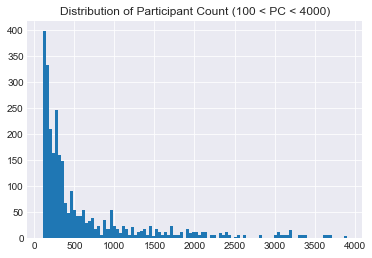

In [11]:
plt.hist(X2[(X2['sb_tot_partcp_cnt']<4000) & (X2['sb_tot_partcp_cnt']>100)]['sb_tot_partcp_cnt'],bins=100)
plt.title('Distribution of Participant Count (100 < PC < 4000)')
plt.show()

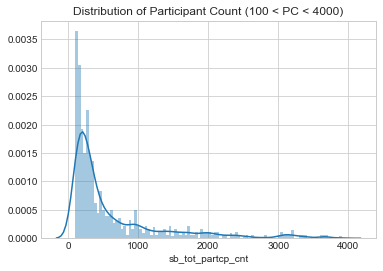

In [18]:
sns.distplot(X2[(X2['sb_tot_partcp_cnt']<4000) & (X2['sb_tot_partcp_cnt']>100)]['sb_tot_partcp_cnt'],\
            bins=100)
plt.title('Distribution of Participant Count (100 < PC < 4000)')
plt.show()

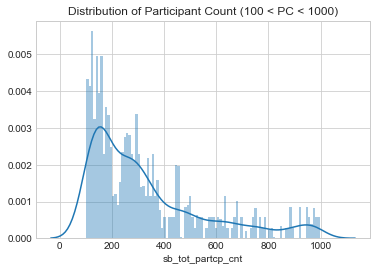

In [19]:
sns.distplot(X2[(X2['sb_tot_partcp_cnt']<1000) & (X2['sb_tot_partcp_cnt']>100)]['sb_tot_partcp_cnt'],\
            bins=100)
plt.title('Distribution of Participant Count (100 < PC < 1000)')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

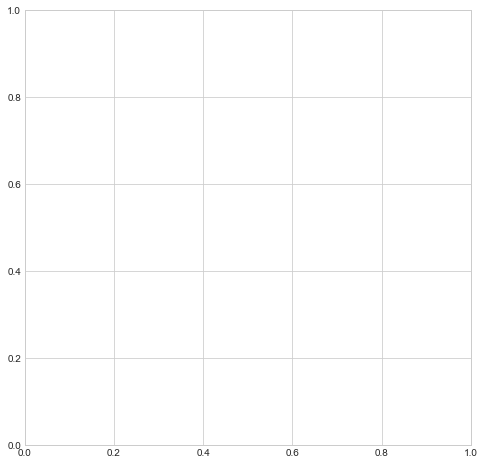

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=X2['sb_tot_partcp_cnt'], y=y)
plt.title('Participant Count vs Funded Status')
plt.show()

In [ ]:
eir_nonzero = X2[(X2['sb_eff_int_rate_prcnt'] >1) & (X2['sb_eff_int_rate_prcnt'] < 10) \
                & (X2['sb_fndng_tgt_prcnt'] > 0) & (X2['sb_fndng_tgt_prcnt'] < 400) & (X2['sb_plan_type_code'] == '1')]
y_eirnonzero = eir_nonzero['sb_fndng_tgt_prcnt'].values

In [ ]:
eir_nonzero.shape, y_eirnonzero.shape, eir_nonzero['sb_eff_int_rate_prcnt'].shape

In [ ]:
eir_nonzero['sb_eff_int_rate_prcnt'].describe()

In [ ]:
plt.hist(eir_nonzero['sb_eff_int_rate_prcnt'],bins=100)
plt.title('Distribution of EIR (1.0 < EIR < 10.0)')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
#plt.scatter(X['sb_pr_yr_fndng_prcnt'], y_fs)
plt.scatter(eir_nonzero['sb_eff_int_rate_prcnt'], y_eirnonzero)
plt.xlabel('Effective Interest Rate')
plt.ylabel('Funded Status (AVA basis)')
plt.title('FS vs EIR')
plt.show()

In [ ]:
pd.DataFrame(eir_nonzero['sb_eff_int_rate_prcnt']).boxplot(sym=)
plt.show()

In [ ]:
sns.boxplot(pd.DataFrame(eir_nonzero['sb_eff_int_rate_prcnt']))
plt.title('Boxplot of EIR')
plt.show()

In [ ]:
eir_nonzero['sb_eff_int_rate_prcnt'].describe()

In [ ]:
sns.boxplot(prelim_feat_df['sb_fndng_tgt_prcnt'])
plt.title('Boxplot of FS - all plans')
plt.show()

In [ ]:
sns.boxplot(eir_nonzero['sb_fndng_tgt_prcnt'])
plt.title('Boxplot of FS (0<FS<400%)')
plt.show()